# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import the libraries you will be using for analysis

In [7]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [11]:
# Try loading one file

df = pd.read_parquet('sampled_nyc_taxi.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             467 non-null    int64         
 1   VendorID               467 non-null    int64         
 2   tpep_pickup_datetime   467 non-null    datetime64[ns]
 3   tpep_dropoff_datetime  467 non-null    object        
 4   passenger_count        452 non-null    float64       
 5   trip_distance          467 non-null    float64       
 6   RatecodeID             452 non-null    float64       
 7   store_and_fwd_flag     452 non-null    object        
 8   PULocationID           467 non-null    int64         
 9   DOLocationID           467 non-null    int64         
 10  payment_type           467 non-null    int64         
 11  fare_amount            467 non-null    float64       
 12  extra                  467 non-null    float64       
 13  mta_t

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [18]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
sampled_dfs = []
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
    
# Extract date and hour
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    
# Group by date & hour and sample 5%
sampled_df = df.groupby(['pickup_date', 'pickup_hour']).apply(
    lambda x: x.sample(frac=0.05, random_state=42)
).reset_index(drop=True)
    
    # Store the sampled DataFrame
sampled_dfs.append(sampled_df)

# Step 3: Combine all sampled data
final_sampled_df = pd.concat(sampled_dfs, ignore_index=True)

# Optional: Save to file
final_sampled_df.to_parquet('sampled_nyc_taxi.parquet', index=False)

print("Done! Final sampled data shape:", final_sampled_df.shape)

Done! Final sampled data shape: (0, 25)


/var/folders/jf/38g39c_d7mxdml0qg4c87l540000gn/T/ipykernel_2293/3970924445.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(['pickup_date', 'pickup_hour']).apply(


In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/apple/Downloads')

# Create a list of all the twelve files to read
file_list = os.listdir()

file_list = [f for f in os.listdir() if f.endswith(('.parquet'))]

# Initialise an empty dataframe to store the combined results
df = pd.DataFrame()

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"\nProcessing file: {file_name}")

        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file (supports both .csv and .parquet)
        #if file_name.endswith('.csv'):
         #   monthly_df = pd.read_csv(file_path)
        if file_name.endswith('.parquet'):
            monthly_df = pd.read_parquet(file_path)

        # Ensure datetime column is in correct format
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_df['pickup_date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['pickup_hour'] = monthly_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current file
        sampled_data = pd.DataFrame()

        # Loop through each date
        for date in monthly_df['pickup_date'].unique():
            date_df = monthly_df[monthly_df['pickup_date'] == date]

            # Loop through each hour
            for hour in range(24):
                hour_df = date_df[date_df['pickup_hour'] == hour]

                if not hour_df.empty:
                    # Sample 5% of the hourly data randomly
                    sample = hour_df.sample(frac=0.05, random_state=42)

                    # Add this hour's sample to the file-level dataframe
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Append this month's sampled data to the main dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"❌ Error reading file {file_name}: {e}")

# (Optional) Save the final combined sampled dataset
df.to_parquet('sampled_nyc_taxi_full_year.parquet', index=False)
# Or as CSV if needed:
# df.to_csv('sampled_nyc_taxi_full_year.csv', index=False)



Processing file: yellow_tripdata_2025-01.parquet

Processing file: sampled_nyc_taxi_full_year.parquet

Processing file: sampled_nyc_taxi_final.parquet

Processing file: yellow_tripdata_2023-01.parquet

Processing file: sampled_nyc_taxi.parquet

Processing file: yellow_tripdata_2023-02.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [24]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet('sampled_nyc_taxi_final.parquet', index=False)
df.to_csv('sampled_nyc_taxi_final.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [78]:
df_filtered = pd.read_csv('sampled_nyc_taxi_final.csv')

In [84]:
# Load the new data file
df_filtered = pd.read_csv('sampled_nyc_taxi_final.csv')

# Converting pickup and dropoff datetime columns to datetime format
df_filtered['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df_filtered['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df_filtered

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee,Unnamed: 0,tpep_pickup_date,tpep_pickup_time,pickup_datetime
0,2,2025-01-01 00:36:00,2025-01-01 01:04:56,1.0,3.63,1.0,N,234,143,1,...,39.00,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
1,2,2025-01-01 00:14:06,2025-01-01 00:51:56,1.0,16.44,5.0,N,132,113,1,...,107.44,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
2,2,2025-01-01 00:23:15,2025-01-01 00:28:01,1.0,0.91,1.0,N,142,239,1,...,14.64,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
3,2,2025-01-01 00:55:00,2025-01-01 01:03:32,NaN,1.55,NaN,NaN,40,228,0,...,1.11,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
4,2,2025-01-01 00:45:31,2025-01-01 01:05:16,1.0,2.16,1.0,N,162,143,2,...,23.40,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520021,2,2023-02-28 23:28:03,2023-03-01 00:00:31,2.0,5.95,1.0,N,113,37,1,...,45.72,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN
520022,1,2023-02-28 23:40:08,2023-02-28 23:46:56,1.0,2.10,1.0,N,170,263,1,...,18.85,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN
520023,2,2023-02-28 23:08:26,2023-02-28 23:10:31,1.0,0.50,1.0,N,164,234,1,...,12.12,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN
520024,2,2023-02-28 23:14:40,2023-02-28 23:31:39,1.0,0.00,1.0,N,162,151,1,...,21.20,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN


In [86]:
 df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee,Unnamed: 0,tpep_pickup_date,tpep_pickup_time,pickup_datetime
0,2,2025-01-01 00:36:00,2025-01-01 01:04:56,1.0,3.63,1.0,N,234,143,1,...,39.00,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
1,2,2025-01-01 00:14:06,2025-01-01 00:51:56,1.0,16.44,5.0,N,132,113,1,...,107.44,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
2,2,2025-01-01 00:23:15,2025-01-01 00:28:01,1.0,0.91,1.0,N,142,239,1,...,14.64,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
3,2,2025-01-01 00:55:00,2025-01-01 01:03:32,NaN,1.55,NaN,None,40,228,0,...,1.11,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
4,2,2025-01-01 00:45:31,2025-01-01 01:05:16,1.0,2.16,1.0,N,162,143,2,...,23.40,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN


In [95]:
# df.info()

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [88]:
# Fix the index and drop any columns that are not needed

# Dropping columns that are not useful for analysis
columns_to_drop = ['store_and_fwd_flag', 'extra', 'mta_tax']
df_filtered.drop(columns=[col for col in columns_to_drop if col in df_filtered.columns], inplace=True)

# Reset the index
df_filtered.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
df_filtered


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee,Unnamed: 0,tpep_pickup_date,tpep_pickup_time,pickup_datetime
0,2,2025-01-01 00:36:00,2025-01-01 01:04:56,1.0,3.63,1.0,234,143,1,27.50,...,39.00,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
1,2,2025-01-01 00:14:06,2025-01-01 00:51:56,1.0,16.44,5.0,132,113,1,87.00,...,107.44,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
2,2,2025-01-01 00:23:15,2025-01-01 00:28:01,1.0,0.91,1.0,142,239,1,7.20,...,14.64,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
3,2,2025-01-01 00:55:00,2025-01-01 01:03:32,NaN,1.55,NaN,40,228,0,-3.28,...,1.11,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
4,2,2025-01-01 00:45:31,2025-01-01 01:05:16,1.0,2.16,1.0,162,143,2,18.40,...,23.40,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520021,2,2023-02-28 23:28:03,2023-03-01 00:00:31,2.0,5.95,1.0,113,37,1,33.10,...,45.72,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN
520022,1,2023-02-28 23:40:08,2023-02-28 23:46:56,1.0,2.10,1.0,170,263,1,10.70,...,18.85,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN
520023,2,2023-02-28 23:08:26,2023-02-28 23:10:31,1.0,0.50,1.0,164,234,1,5.10,...,12.12,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN
520024,2,2023-02-28 23:14:40,2023-02-28 23:31:39,1.0,0.00,1.0,162,151,1,14.20,...,21.20,2.5,0.0,2023-02-28,23,NaN,NaN,NaN,NaN,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [91]:
# Handle and normalize airport fee column(s)
if 'Airport_fee' in df_filtered.columns and 'Airport_fee.1' in df_filtered.columns:
    df_filtered['airport_fee_combined'] = df_filtered['Airport_fee'].fillna(0) + df_filtered['Airport_fee.1'].fillna(0)
    df_filtered.drop(['Airport_fee', 'Airport_fee.1'], axis=1, inplace=True)

elif 'Airport_fee' in df_filtered.columns:
    df_filtered.rename(columns={'Airport_fee': 'airport_fee_combined'}, inplace=True)

elif 'Airport_fee.1' in df_filtered.columns:
    df_filtered.rename(columns={'Airport_fee.1': 'airport_fee_combined'}, inplace=True)

# Now preview safely
if 'airport_fee_combined' in df_filtered.columns:
    print(df_filtered[['airport_fee_combined']].head())
else:
    print("No airport fee column found or combined.")




   airport_fee_combined
0                   0.0
1                   0.0
2                   0.0
3                   NaN
4                   0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [93]:
# check where values of fare amount are negative

#  Step 1: Ensure df_filtered is a DataFrame
print("Type of df_filtered:", type(df_filtered))

#  Step 2: Filter rows where fare_amount is negative
# These might be data entry errors or edge cases
negative_fares = df_filtered[df_filtered['fare_amount'] < 0]

#  Step 3: Display how many such rows exist
print(f"Number of rows with negative fare_amount: {len(negative_fares)}")

#  Step 4: Show first few rows to inspect
negative_fares.head()

Type of df_filtered: <class 'pandas.core.frame.DataFrame'>
Number of rows with negative fare_amount: 10561


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,congestion_surcharge,airport_fee_combined,pickup_date,pickup_hour,airport_fee,Unnamed: 0,tpep_pickup_date,tpep_pickup_time,pickup_datetime
3,2,2025-01-01 00:55:00,2025-01-01 01:03:32,NaN,1.55,NaN,40,228,0,-3.28,...,1.11,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
21,2,2025-01-01 00:38:14,2025-01-01 00:51:09,NaN,1.50,NaN,107,211,0,-4.89,...,-0.89,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
35,2,2025-01-01 00:32:49,2025-01-01 00:39:27,NaN,0.65,NaN,211,144,0,-0.54,...,3.46,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
73,2,2025-01-01 00:54:48,2025-01-01 01:29:42,NaN,17.43,NaN,252,261,0,-0.62,...,3.38,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
95,2,2025-01-01 00:55:01,2025-01-01 01:04:56,NaN,0.67,NaN,170,162,0,-2.82,...,1.18,NaN,NaN,2025-01-01,0,NaN,NaN,NaN,NaN,NaN


Did you notice something different in the `RatecodeID` column for above records?

In [95]:
# Group and count the RatecodeID values for negative fare amounts
ratecode_negative_fares = negative_fares['RatecodeID'].value_counts().sort_index()

# Display the result
print(ratecode_negative_fares)

RatecodeID
1.0    5399
2.0     389
3.0      76
4.0      25
5.0     139
Name: count, dtype: int64


In [99]:
# Step 1: Select only numeric columns
numeric_columns = df_filtered.select_dtypes(include=['number'])

# Step 2: Check for negative values in numeric columns
negative_values = (numeric_columns < 0).sum()

# Step 3: Display columns with negative values and their counts
print("Columns with negative values and their counts:")
print(negative_values)

Columns with negative values and their counts:
VendorID                     0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount              10561
tip_amount                  50
tolls_amount               396
improvement_surcharge     6074
total_amount              6287
congestion_surcharge      4819
airport_fee_combined       725
pickup_hour                  0
airport_fee                191
Unnamed: 0                   0
tpep_pickup_date             0
tpep_pickup_time             0
pickup_datetime              0
dtype: int64


In [101]:
# Step 1: Identify columns with negative values
negative_columns = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']  # Add more columns if needed

# Step 2: Filter out rows where these columns have negative values
df_filtered = df_filtered[(df_filtered[negative_columns] >= 0).all(axis=1)].copy()

# Step 3: Confirm removal
print("Remaining rows after removing negative values:", df_filtered.shape[0])

Remaining rows after removing negative values: 509418


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [103]:
# Find the proportion of missing values in each column
# Calculate proportion of missing values for each column
missing_proportion = df_filtered.isnull().mean().sort_values(ascending=False)

# Display missing value proportions as percentages
missing_proportion = (missing_proportion * 100).round(2)

# Print the result
print("Proportion of Missing Values (%):")
print(missing_proportion)


Proportion of Missing Values (%):
pickup_datetime          100.00
tpep_pickup_time         100.00
tpep_pickup_date         100.00
Unnamed: 0               100.00
airport_fee               67.94
airport_fee_combined      38.46
passenger_count            6.40
RatecodeID                 6.40
congestion_surcharge       6.40
total_amount               0.00
pickup_hour                0.00
pickup_date                0.00
VendorID                   0.00
improvement_surcharge      0.00
tpep_pickup_datetime       0.00
tip_amount                 0.00
fare_amount                0.00
payment_type               0.00
DOLocationID               0.00
PULocationID               0.00
trip_distance              0.00
tpep_dropoff_datetime      0.00
tolls_amount               0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [105]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Display rows that contain at least one null value
null_rows = df_filtered[df_filtered.isnull().any(axis=1)]
print(f"Number of rows with missing values: {len(null_rows)}")
null_rows.head()

Number of rows with missing values: 509418


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,total_amount,congestion_surcharge,airport_fee_combined,pickup_date,pickup_hour,airport_fee,Unnamed: 0,tpep_pickup_date,tpep_pickup_time,pickup_datetime
0,2,2025-01-01 00:36:00,2025-01-01 01:04:56,1.0,3.63,1.0,234,143,1,27.5,...,39.00,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
1,2,2025-01-01 00:14:06,2025-01-01 00:51:56,1.0,16.44,5.0,132,113,1,87.0,...,107.44,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
2,2,2025-01-01 00:23:15,2025-01-01 00:28:01,1.0,0.91,1.0,142,239,1,7.2,...,14.64,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
4,2,2025-01-01 00:45:31,2025-01-01 01:05:16,1.0,2.16,1.0,162,143,2,18.4,...,23.40,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN
5,2,2025-01-01 00:46:31,2025-01-01 00:57:04,3.0,1.53,1.0,148,231,1,11.4,...,19.68,2.5,0.0,2025-01-01,0,NaN,NaN,NaN,NaN,NaN


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [107]:
# Impute NaN values in 'RatecodeID' with the mode (most frequent value)
ratecode_id_mode = df_filtered['RatecodeID'].mode()[0]
df_filtered['RatecodeID'].fillna(ratecode_id_mode, inplace=True)

# Verify if missing values have been handled
print(f"Remaining missing values in 'RatecodeID': {df_filtered['RatecodeID'].isnull().sum()}")

Remaining missing values in 'RatecodeID': 0


/var/folders/jf/38g39c_d7mxdml0qg4c87l540000gn/T/ipykernel_2293/4224967263.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['RatecodeID'].fillna(ratecode_id_mode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [109]:
# Check missing values
missing_congestion = df_filtered['congestion_surcharge'].isnull().sum()
print(f"Missing values in 'congestion_surcharge': {missing_congestion}")

# View distribution of existing non-null values to decide imputation strategy
print("Unique non-null values in congestion_surcharge:", df_filtered['congestion_surcharge'].dropna().unique())
print("Most common value (mode):", df_filtered['congestion_surcharge'].mode()[0])




Missing values in 'congestion_surcharge': 32604
Unique non-null values in congestion_surcharge: [2.5 0. ]
Most common value (mode): 2.5


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [111]:
# Handle any remaining missing values

# Check total number of missing values remaining
total_missing = df_filtered.isnull().sum().sum()
print(f"Total remaining missing values in the dataset: {total_missing}")

# Option 1: Drop all rows that still contain any NaNs (safest if small number of rows)
df_filtered.dropna(inplace=True)

# OR

# Option 2: Fill remaining NaNs with 0 (only if justified by the context)
# df_filtered.fillna(0, inplace=True)

# Confirm that no missing values remain
print("Remaining missing values after cleanup:", df_filtered.isnull().sum().sum())

Total remaining missing values in the dataset: 2644902
Remaining missing values after cleanup: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [113]:
# remove passenger_count > 6

# Remove rows where passenger_count is greater than 6
df_filtered = df_filtered[df_filtered['passenger_count'] <= 6]

# Confirm the changes
print(f"Remaining rows after removing passenger_count > 6: {df_filtered.shape[0]}")

Remaining rows after removing passenger_count > 6: 0


In [115]:
# Continue with outlier handling

# 1. Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df_filtered = df_filtered[~((df_filtered['trip_distance'] < 0.1) & (df_filtered['fare_amount'] > 300))]

# 2. Remove entries where both trip_distance and fare_amount are 0, but the pickup and dropoff zones are different
df_filtered = df_filtered[~((df_filtered['trip_distance'] == 0) & (df_filtered['fare_amount'] == 0) & 
                             (df_filtered['PULocationID'] != df_filtered['DOLocationID']))]

# 3. Remove entries where trip_distance is more than 250 miles
df_filtered = df_filtered[df_filtered['trip_distance'] <= 250]

# 4. Remove entries where payment_type is 0 (invalid payment type)
df_filtered = df_filtered[df_filtered['payment_type'] != 0]

# Confirm that the changes were applied successfully
print(f"Remaining rows after outlier handling: {df_filtered.shape[0]}")



Remaining rows after outlier handling: 0


In [117]:
# Do any columns need standardising?

# Get a summary of the numeric columns
summary = df_filtered.describe()

# Check columns with wide range of values and large standard deviations
print(summary)

# Additional check: Check if values are in different units (and could benefit from scaling)
columns_to_standardize = ['trip_distance', 'fare_amount', 'total_amount', 'passenger_count', 'congestion_surcharge', 'airport_fee_combined']

# Check the scale of those columns
print(df_filtered[columns_to_standardize].head())

       VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
count       0.0                    0                     0              0.0   
mean        NaN                  NaT                   NaT              NaN   
min         NaN                  NaT                   NaT              NaN   
25%         NaN                  NaT                   NaT              NaN   
50%         NaN                  NaT                   NaT              NaN   
75%         NaN                  NaT                   NaT              NaN   
max         NaN                  NaT                   NaT              NaN   
std         NaN                  NaN                   NaN              NaN   

       trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
count            0.0         0.0           0.0           0.0           0.0   
mean             NaN         NaN           NaN           NaN           NaN   
min              NaN         NaN           NaN        

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [119]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_date',
 'pickup_hour',
 'airport_fee',
 'Unnamed: 0',
 'tpep_pickup_date',
 'tpep_pickup_time',
 'pickup_datetime']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

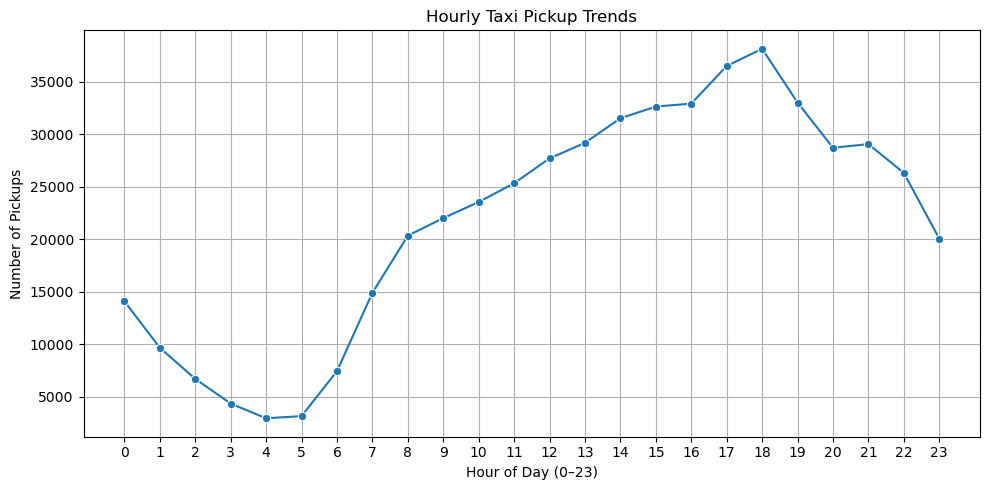

In [121]:
# Find and show the hourly trends in taxi pickups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract the pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and count pickups
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker='o')
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/jf/38g39c_d7mxdml0qg4c87l540000gn/T/ipykernel_2293/1190587501.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='viridis')


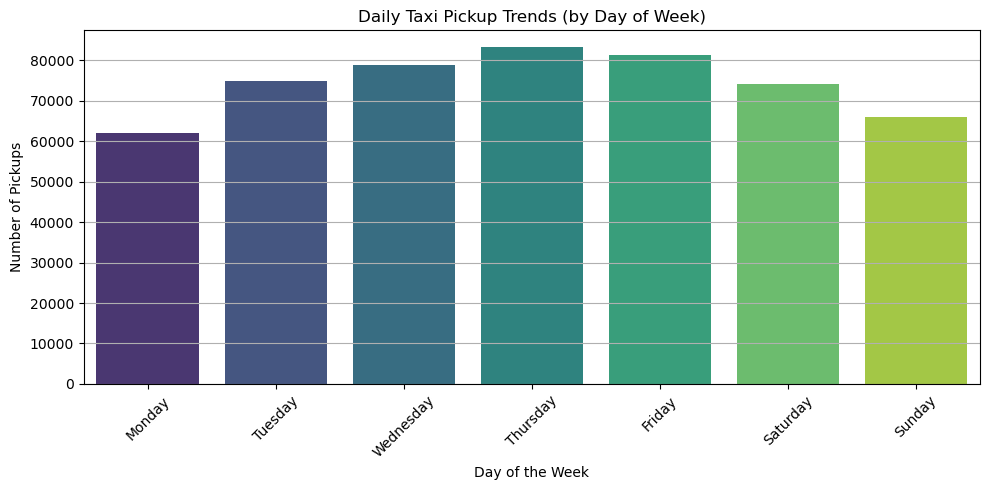

In [123]:
# Find and show the daily trends in taxi pickups (days of the week)

# Convert to datetime if not already done
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract the day of the week (0=Monday, 6=Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Map numeric days to weekday names
day_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['pickup_day_name'] = df['pickup_day'].map(day_map)

# Count pickups per day
daily_pickups = df['pickup_day_name'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='viridis')
plt.title('Daily Taxi Pickup Trends (by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

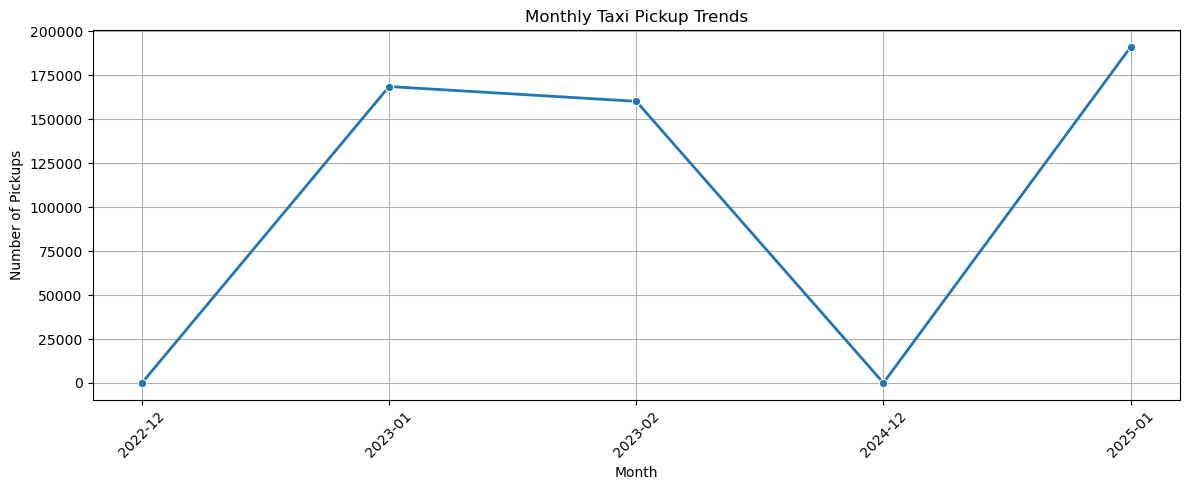

In [125]:
# Show the monthly trends in pickups

# Convert to datetime if not already done
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract the month and year (useful if data spans multiple years)
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Count pickups per month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_pickups.index.astype(str), y=monthly_pickups.values, marker='o', linewidth=2)
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [129]:
# Analyse the above parameters
# List of columns to check
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Check for zero or negative values
for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    total_rows = df.shape[0]
    
    print(f"\nColumn: {col}")
    print(f"Zero values: {zero_count} ({(zero_count/total_rows)*100:.2f}%)")
    print(f"Negative values: {negative_count} ({(negative_count/total_rows)*100:.2f}%)")




Column: fare_amount
Zero values: 238 (0.05%)
Negative values: 10561 (2.03%)

Column: tip_amount
Zero values: 134244 (25.81%)
Negative values: 50 (0.01%)

Column: total_amount
Zero values: 121 (0.02%)
Negative values: 6287 (1.21%)

Column: trip_distance
Zero values: 9926 (1.91%)
Negative values: 0 (0.00%)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [131]:
# Create a df with non zero entries for the selected parameters.

# Create a DataFrame with non-zero entries for the selected parameters
df_non_zero = df[
    (df['fare_amount'] != 0) &
    (df['tip_amount'] != 0) &
    (df['total_amount'] != 0) &
    (df['trip_distance'] != 0)
].copy()

# Check the result
print(f"Original dataset: {len(df)} rows")
print(f"Non-zero filtered dataset: {len(df_non_zero)} rows")
print(f"Data retained: {(len(df_non_zero)/len(df))*100:.2f}%")

Original dataset: 520026 rows
Non-zero filtered dataset: 383279 rows
Data retained: 73.70%


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

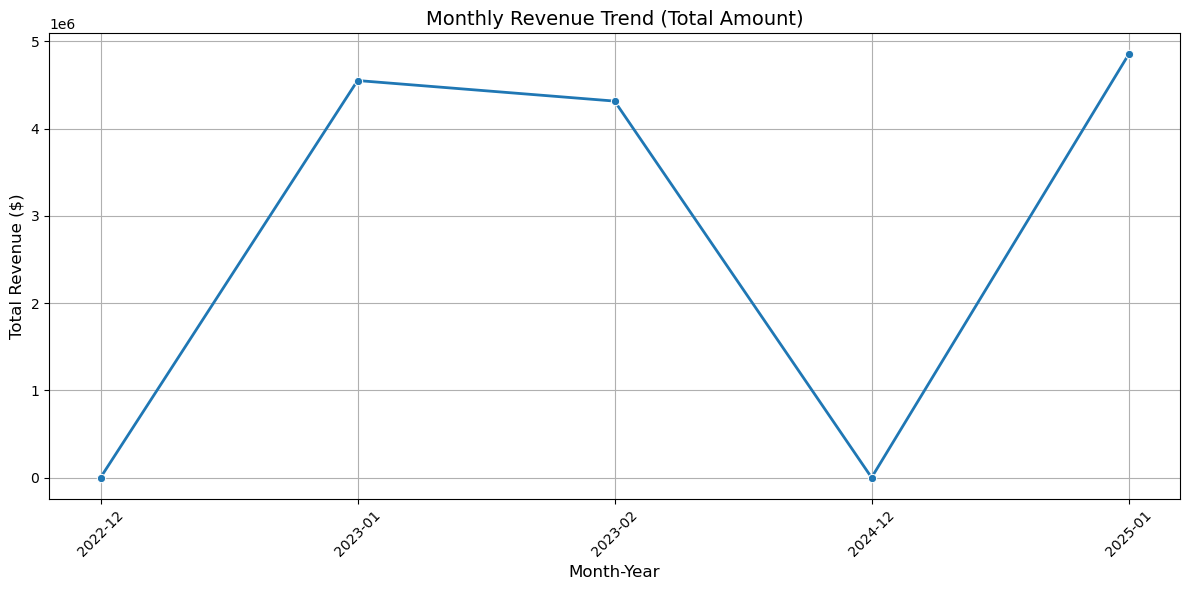

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract the month and year from the pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M')

# Group by month-year and sum the total_amount for each period
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()

# Plot the monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values, marker='o', linewidth=2)
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [145]:
# Extract the quarter from the pickup datetime
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

# Group by quarter and sum the total_amount for each period
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()

# Calculate the total revenue
total_revenue = quarterly_revenue.sum()

# Calculate the proportion of each quarter
quarterly_proportion = (quarterly_revenue / total_revenue) * 100

# Display the proportions
print(quarterly_proportion)

pickup_quarter
2022Q4     0.000098
2023Q1    64.642771
2024Q4     0.000505
2025Q1    35.356625
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

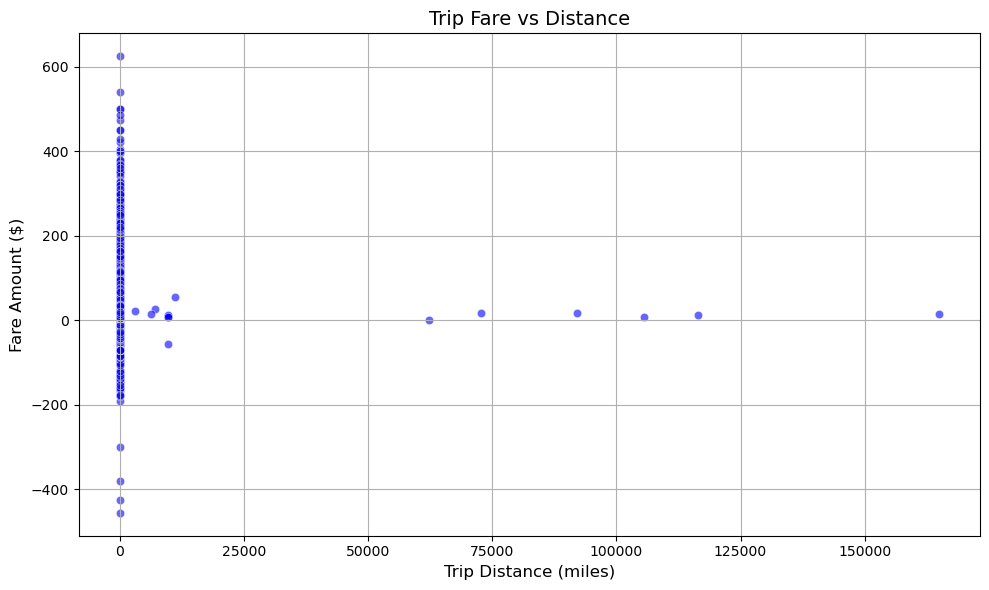

Correlation between trip fare and distance: 0.01


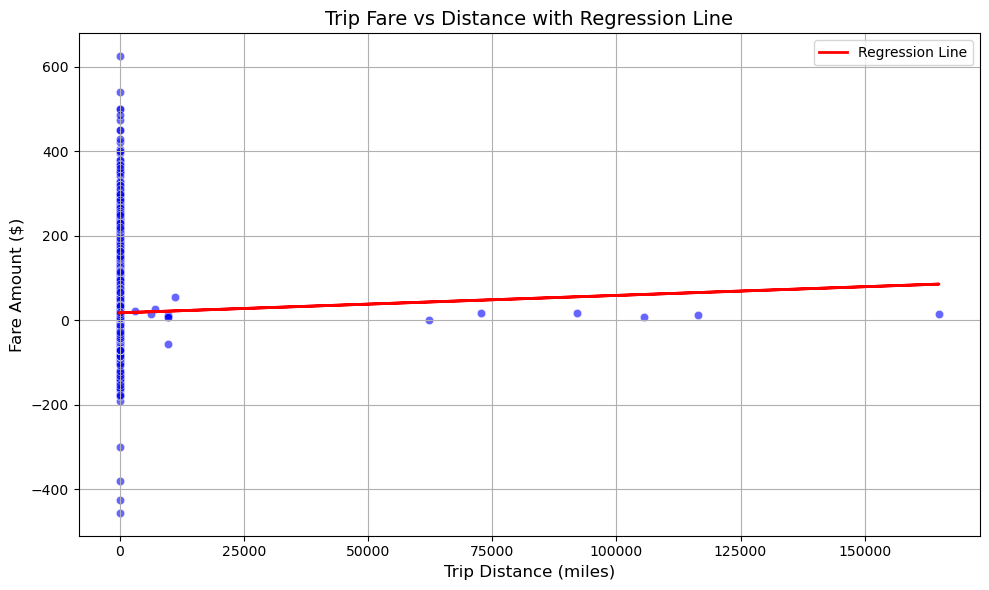

Linear Regression Equation: Fare = 17.74 + 0.00 * Distance


In [149]:
# Show how trip fare is affected by distance

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the scatter plot between fare_amount and trip_distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.6, color='blue')
plt.title('Trip Fare vs Distance', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient between trip_distance and fare_amount
correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Correlation between trip fare and distance: {correlation:.2f}")

from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = df[['trip_distance']]  # Independent variable
y = df['fare_amount']      # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the scatter plot and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', alpha=0.6, color='blue')
plt.plot(df['trip_distance'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Trip Fare vs Distance with Regression Line', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the regression parameters
print(f"Linear Regression Equation: Fare = {model.intercept_:.2f} + {model.coef_[0]:.2f} * Distance")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

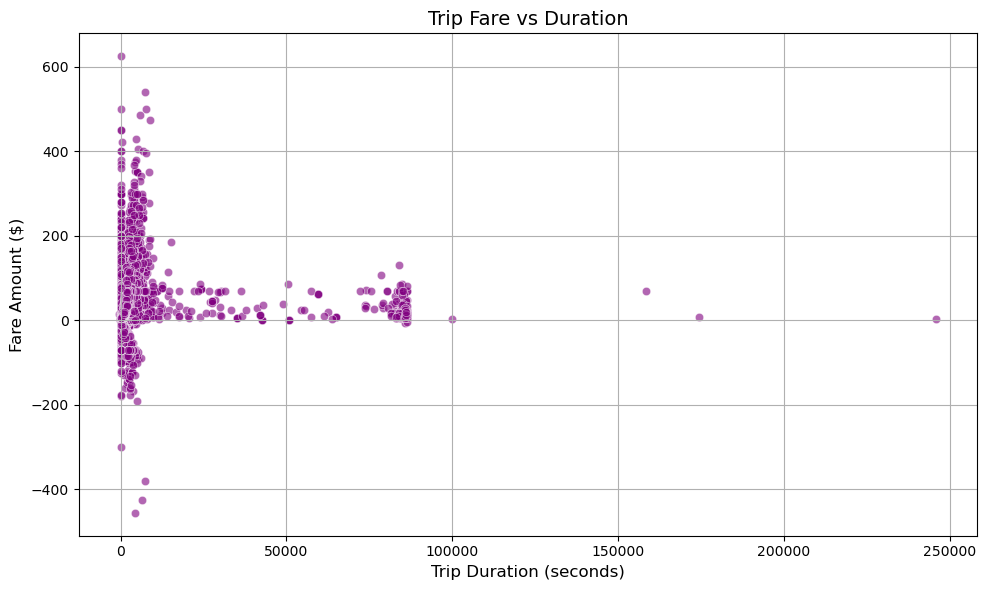

Correlation between trip fare and duration: 0.23


In [153]:
# Ensure 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' are in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

# Calculate the trip duration in seconds
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

# Check the first few rows to verify the new column
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration']].head()

# Plot the scatter plot between fare_amount and trip_duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_duration', y='fare_amount', alpha=0.6, color='purple')
plt.title('Trip Fare vs Duration', fontsize=14)
plt.xlabel('Trip Duration (seconds)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient between trip_duration and fare_amount
correlation_duration_fare = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip fare and duration: {correlation_duration_fare:.2f}")

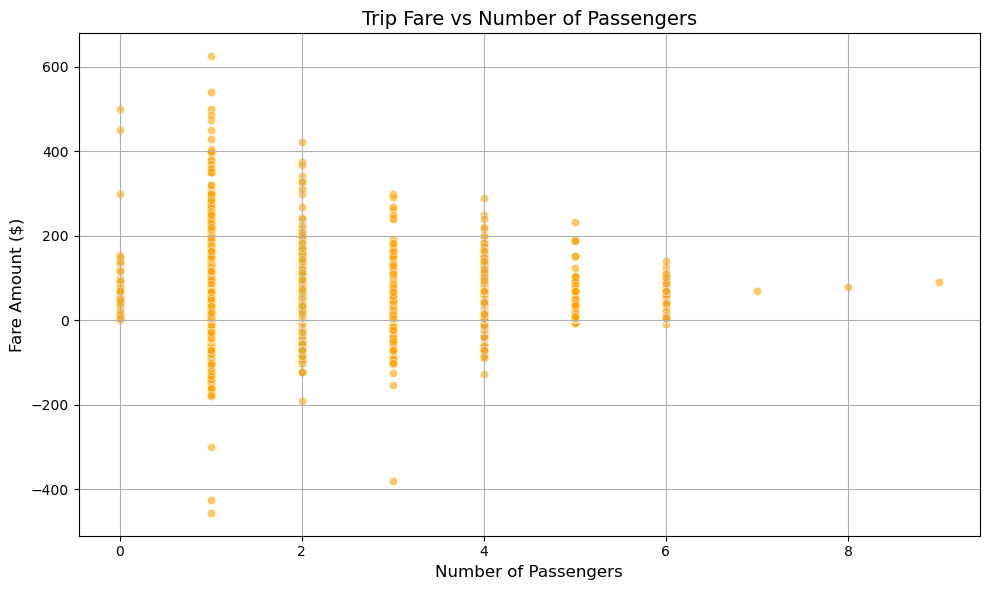

Correlation between trip fare and number of passengers: 0.04
passenger_count
0.0    16.243942
1.0    17.420728
2.0    19.820044
3.0    19.214299
4.0    21.048409
5.0    18.021413
6.0    17.558894
7.0    70.000000
8.0    80.000000
9.0    90.000000
Name: fare_amount, dtype: float64


In [155]:
# Show relationship between fare and number of passengers

# Plot the scatter plot between fare_amount and passenger_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='passenger_count', y='fare_amount', alpha=0.6, color='orange')
plt.title('Trip Fare vs Number of Passengers', fontsize=14)
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient between passenger_count and fare_amount
correlation_passenger_fare = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between trip fare and number of passengers: {correlation_passenger_fare:.2f}")

# Calculate the average fare for each number of passengers
average_fare_by_passenger = df.groupby('passenger_count')['fare_amount'].mean()

# Display the result
print(average_fare_by_passenger)

In [ ]:
# Show relationship between tip and trip distance



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = # read the .shp file using gpd
zones.head()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID



**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [1]:
%pwd

'/Users/apple/Downloads'